In [491]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ee-769-assignment1/sample_submission.csv
/kaggle/input/ee-769-assignment1/test.csv
/kaggle/input/ee-769-assignment1/train.csv


In [492]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
plt.style.use('ggplot')

In [493]:
#Load the dataset
train = pd.read_csv('../input/ee-769-assignment1/train.csv')
test = pd.read_csv('../input/ee-769-assignment1/test.csv')

In [494]:
X_train = train.drop("Attrition",axis=1)
X_test = test
y = train["Attrition"].values

In [495]:
# convert objects to numbers by pandas.get_dummies
X_train = pd.get_dummies(X_train, columns=["Gender", "BusinessTravel", "Department", "EducationField", "JobRole", "MaritalStatus", "OverTime"])
X_test = pd.get_dummies(X_test, columns=["Gender", "BusinessTravel", "Department", "EducationField", "JobRole", "MaritalStatus", "OverTime"])

In [496]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [497]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [498]:
knn_cv.best_score_
knn_cv.best_params_

{'n_neighbors': 18}

In [499]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y)
y_pred = knn.predict(X_test)
res = pd.DataFrame({"ID": X_test["ID"], "Attrition": y_pred})

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [500]:
with open('output.csv', 'w') as csv_file:
    res.to_csv(path_or_buf=csv_file, index = False)

In [501]:
X_train,X_validation,y_train,y_validation = train_test_split(X_train,y,test_size=0.4,random_state=42, stratify=y)

In [502]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_validation, y_validation) 
train_accuracy.max(),test_accuracy.max()

(1.0, 0.8325242718446602)

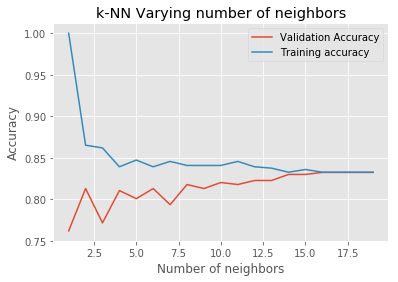

In [503]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Validation Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [504]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=18)

In [505]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

In [506]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_validation,y_validation)

0.8325242718446602

In [507]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_validation)

In [508]:
confusion_matrix(y_validation,y_pred)

array([[343,   0],
       [ 69,   0]])

In [509]:
# Confusion matrix can also be obtained using crosstab method of pandas.
pd.crosstab(y_validation, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,All
True,,
0,343,343
1,69,69
All,412,412


In [510]:
print(classification_report(y_validation,y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       343
           1       0.00      0.00      0.00        69

    accuracy                           0.83       412
   macro avg       0.42      0.50      0.45       412
weighted avg       0.69      0.83      0.76       412



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


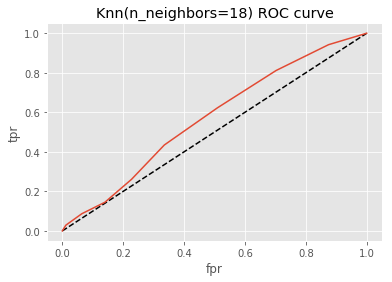

In [511]:
# ROC curve is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.
# An ROC curve demonstrates several things:
# 1) It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
# 2) The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
# 3)The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
# 4) The area under the curve is a measure of test accuracy.

y_pred_proba = knn.predict_proba(X_validation)[:,1]
fpr, tpr, thresholds = roc_curve(y_validation, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=18) ROC curve')
plt.show()

In [512]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_validation,y_pred_proba)

0.5703933747412009